In [11]:
import requests
from urllib.parse import urlparse, quote
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [12]:
# 서비스키 가져오기
key_fd = open('./data/corona_key.txt')
key = key_fd.read(200)
key_fd.close()

In [13]:
# 검색할 날짜 만들기
month_11 = pd.date_range(start='2020-03-02',end='2020-11-30',freq='d')


### 한방에 읽기

In [14]:
# corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
# startDate = month_11[0].strftime('%Y%m%d')
# endDate = month_11[-1].strftime('%Y%m%d')
# url = f'{corona_url}?serviceKey={key}&pageNo=1&numOfRows=10&startCreateDt={startDate}&endCreateDt={endDate}' 
# result = requests.get(urlparse(url).geturl())
# html = result.text
# soup = BeautifulSoup(html, 'html.parser')

In [15]:
# # 빈 데이터프레임 생성
# corona_area = pd.DataFrame(columns = ['지역'])
# gubun = []
# createDt = []
# defCnt = []
# deathCnt = []
# clearCnt = []
# gubunEn = []
# qurRate = []
# isolIngCnt = []
# localOccCnt = []

# item = soup.find_all('item')
# for i in range(len(item)):
#     if item[i].select('gubun')[0].string in ['검역','합계']:
#         print(item[i].select('gubun')[0].string)
#         continue
#     gubun.append(item[i].select('gubun')[0].get_text())
#     gubunEn.append(item[i].select('gubunEn')[0].get_text())
#     createDt.append(item[i].select('createDt')[0].get_text())
#     defCnt.append(item[i].select('defCnt')[0].get_text() if soup.select('defCnt') else '')
#     deathCnt.append(item[i].select('deathCnt')[0].get_text())
#     clearCnt.append(item[i].select('isolClearCnt')[0].get_text() if soup.select('isolClearCnt') else '')
#     qurRate.append(item[i].select('qurRate')[0].get_text() if soup.select('qurRate') else '')
#     isolIngCnt.append(item[i].select('isolIngCnt')[0].get_text() if soup.select('isolIngCnt') else '')
#     localOccCnt.append(item[i].select('localOccCnt')[0].get_text() if soup.select('localOccCnt') else '')

# corona_area['등록시간']=[i for i in createDt]
# corona_area['지역'] = gubun
# corona_area['확진자 수'] = defCnt
# corona_area['격리해제 수'] = clearCnt
# corona_area['사망자 수'] = deathCnt
# corona_area['지역 코드'] = gubunEn
# corona_area['10만명당 발생률'] = qurRate
# corona_area['격리중 환자수'] = isolIngCnt
# corona_area['지역발생 수'] = localOccCnt
# corona_area.info()


In [16]:
# corona_area['등록시간']=[i for i in createDt]
# corona_area['지역'] = gubun
# corona_area['확진자 수'] = defCnt
# corona_area['격리해제 수'] = clearCnt
# corona_area['사망자 수'] = deathCnt
# corona_area['지역 코드'] = gubunEn
# corona_area['10만명당 발생률'] = qurRate
# corona_area['격리중 환자수'] = isolIngCnt
# corona_area['지역발생 수'] = localOccCnt
# corona_area

### 데이터 정리


In [17]:
# # 숫자형으로 바꿈
# corona_area[['확진자 수','격리해제 수','사망자 수','10만명당 발생률','격리중 환자수','지역발생 수']] = corona_area[['확진자 수','격리해제 수','사망자 수','10만명당 발생률','격리중 환자수','지역발생 수']].apply(pd.to_numeric)
# # 등록시간에서 날짜만 남김
# corona_area['등록시간'] = pd.to_datetime(corona_area['등록시간']).dt.date
# corona_area['등록시간'] = pd.to_datetime(corona_area['등록시간'])
# corona_area.info()

In [18]:
# # 피봇으로 정리
# corona_area_week = pd.pivot_table(data=corona_area,columns='지역',index='등록시간')
# corona_area_week

In [19]:
# # monthly_corona = corona_area.set_index('등록시간')
# # monthly_corona = monthly_corona.resample('MS')
# # monthly_corona['등록시간'] = corona_area['등록시간'].strftime('%m월')
# monthly_corona

## LIMITED NUMBER OF SERVICE REQUESTS EXCEEDS ERROR가 발생되서 CSS파일 읽는걸로 대체하겠습니다

In [20]:
# corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
# startDate = month_11[0].strftime('%Y%m%d')
# endDate = month_11[-1].strftime('%Y%m%d')
# url = f'{corona_url}?serviceKey={key}&pageNo=1&numOfRows=10&startCreateDt={startDate}&endCreateDt={endDate}' 
# result = requests.get(urlparse(url).geturl())
# html = result.text
# # html = soup
# soup = BeautifulSoup(html, 'html.parser')
# print(soup)


In [21]:
corona = pd.read_csv("./data/전국코로나일별.csv",sep=',')

,date,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,10,3,469,0,0,0,3,0,7,8,1,13,67,4,1,0,0,586
2,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-04,1,3,405,2,1,2,3,0,7,1,0,1,89,1,0,0,0,516
4,2020-03-05,4,-1,321,0,1,1,0,0,9,2,1,4,87,9,0,-1,1,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2020-11-26,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,571
271,2020-11-27,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,538
272,2020-11-28,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,501
273,2020-11-29,158,22,3,21,6,8,0,3,94,19,22,13,11,15,17,20,1,433


In [22]:
corona['date'] = pd.to_datetime(corona['date'])

In [23]:
corona = corona.set_index('date')

In [24]:
corona_month = corona.resample('M').sum()

In [25]:
corona_month.index = corona_month.index.strftime('%m월')

In [26]:
corona_monthT = corona_month.T
corona_monthT['지역합계'] = corona_monthT.sum(axis=1)

In [51]:
corona_month

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
date,,,,,,,,,,,,,,,,,,
03월,362,32,3552,57,22,9,22,45,389,24,34,60,682,36,7,4,6,5343
04월,183,18,168,29,4,10,4,0,200,17,1,15,65,21,5,6,4,750
05월,228,10,31,113,6,2,9,1,164,4,15,3,14,6,3,4,2,615
06월,452,7,23,135,71,12,3,3,367,8,5,22,10,11,6,5,4,1144
07월,288,17,34,42,49,160,4,0,339,9,9,23,12,25,12,14,7,1044
08월,2267,130,107,335,90,170,30,17,1714,115,55,142,54,77,48,104,19,5474
09월,1424,120,85,200,105,121,58,9,1123,35,43,152,96,55,41,27,14,3708
10월,719,171,42,129,82,16,16,6,1020,55,18,57,36,25,38,16,0,2446
11월,2802,217,58,365,52,185,35,18,1875,373,138,358,117,309,168,239,21,7330


## 지역합계 top5 의 3월부터 11까지의 추이 

In [28]:
corona = corona[corona.columns.difference(['합계'])]
corona.loc['지역합계'] = corona.sum()


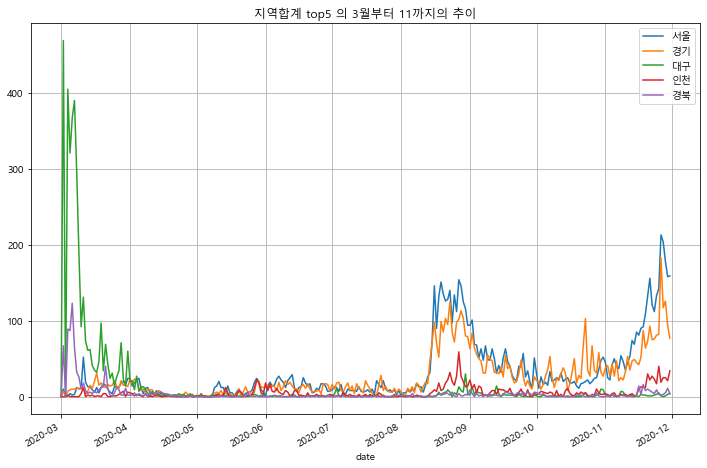

In [29]:
corona[:].T.sort_values('지역합계',ascending=False).iloc[:5].T.iloc[:-1].plot(figsize = (12,8),grid=True,title="지역합계 top5 의 3월부터 11까지의 추이")
plt.show()

## 월별 확진자수 추이 

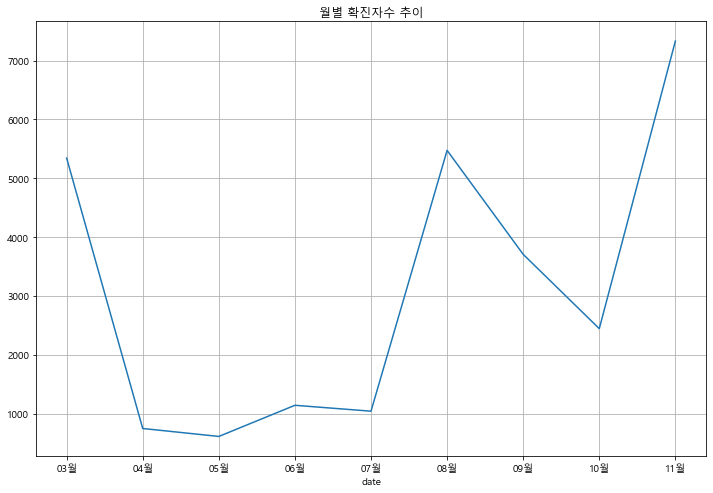

In [30]:
corona_month['합계'].plot(figsize=(12,8),grid=True,title="월별 확진자수 추이")
plt.xticks(rotation = 0 )
plt.show()

## 11월 전국 코로나 확진자수

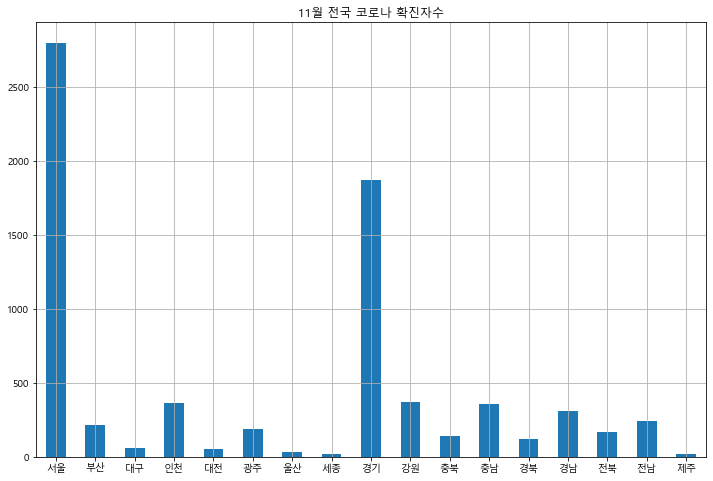

In [31]:
corona_month.T['11월'].iloc[:-1].plot(figsize=(12,8),kind='bar',grid=True,title="11월 전국 코로나 확진자수")
plt.xticks(rotation = 0 )
plt.show()

In [32]:
corona_monthT_sort = corona_monthT.sort_values(by='지역합계',ascending=False).iloc[1:]
corona_monthT_sort.head().T

,서울,경기,대구,인천,경북
date,,,,,
03월,362,389,3552,57,682
04월,183,200,168,29,65
05월,228,164,31,113,14
06월,452,367,23,135,10
07월,288,339,34,42,12
08월,2267,1714,107,335,54
09월,1424,1123,85,200,96
10월,719,1020,42,129,36
11월,2802,1875,58,365,117


## 인구 병합

In [33]:
df = pd.read_csv('D:/workspace/data-home/home/data/성별, 연령별 인구 - 시군구(2019).csv',encoding='euc-kr')

In [34]:
df

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,제주,제주시,NaN,남자,227688,37327,12709,10913,14753,13179,...,18486,21966,20339,18267,14854,9068,7330,5344,3229,1543
830,제주,제주시,NaN,여자,230860,34832,12068,12180,13867,12978,...,17935,21476,19079,17800,14927,9729,8322,7130,5457,4813
831,제주,서귀포시,NaN,계,164899,22974,6964,6483,8511,7889,...,12524,15192,14304,14401,12771,8793,7980,6580,4636,3140
832,제주,서귀포시,NaN,남자,82173,11848,3499,3098,4363,3954,...,6590,8227,7605,7422,6386,4221,3774,2808,1701,780


In [35]:
pop_corona = df[(df['시군구']=='소계') & (df['구분']=='계')][['광역시도', '합계']]

In [36]:
pop_corona = pop_corona.set_index('광역시도')
pop_corona.columns = ['인구수']

In [37]:
corona_monthT.iloc[:-1]['11월']

서울    2802
부산     217
대구      58
인천     365
대전      52
광주     185
울산      35
세종      18
경기    1875
강원     373
충북     138
충남     358
경북     117
경남     309
전북     168
전남     239
제주      21
Name: 11월, dtype: int64

In [38]:
pop_corona['확진자수'] = corona_monthT.iloc[:-1]['11월']
pop_corona

,인구수,확진자수
광역시도,,
서울,9096901,2802
부산,3222121,217
대구,2332499,58
인천,2799553,365
광주,1409750,185
대전,1420059,52
울산,1083587,35
세종,321495,18
경기,12437493,1875


In [39]:
pop_corona['천명당 확진자 수'] = pop_corona['확진자수'] / pop_corona['인구수'] * 1000
pop_corona.head()

,인구수,확진자수,천명당 확진자 수
광역시도,,,
서울,9096901,2802,0.308017
부산,3222121,217,0.067347
대구,2332499,58,0.024866
인천,2799553,365,0.130378
광주,1409750,185,0.131229


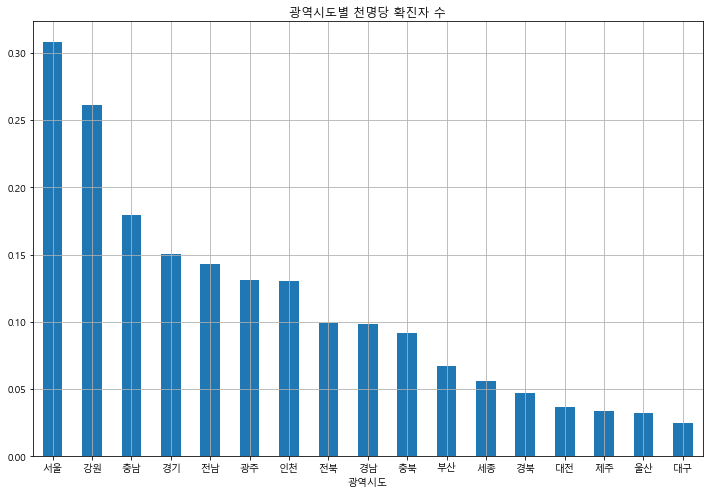

In [40]:
pop_corona['천명당 확진자 수'].sort_values(ascending=False).plot(figsize=(12,8),grid=True,kind='bar',title='광역시도별 천명당 확진자 수')
plt.xticks(rotation = 0 )
plt.show()

## 지도 시각화

In [41]:
from urllib.parse import quote
import folium

In [42]:
key_fd = open('D:/workspace/data-home/home/data/kmap_key.txt', mode='r')
kmap_key = key_fd.read(200)
key_fd.close()

In [43]:
addr = '강서구청'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' +quote(addr)
result = requests.get(urlparse(url).geturl(),headers={"Authorization":"KakaoAK "+kmap_key}).json()
address = result['documents'][0]['x']
address

'126.849533759513'

In [44]:
pop_corona

,인구수,확진자수,천명당 확진자 수
광역시도,,,
서울,9096901,2802,0.308017
부산,3222121,217,0.067347
대구,2332499,58,0.024866
인천,2799553,365,0.130378
광주,1409750,185,0.131229
대전,1420059,52,0.036618
울산,1083587,35,0.032300
세종,321495,18,0.055988
경기,12437493,1875,0.150754


In [45]:
cityHalls = ['서울특별시청','부산광역시청', '대구광역시청','인천광역시청','광주광역시청','대전광역시청','울산광역시청','세종특별자치시청', '경기도청','강원도청','충청북도청', '충청남도청', '전라북도청', '전라남도청','경상북도청', '경상남도청','제주특별자치도청']
x = []
y = []
for i in cityHalls:
    addr = i
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' +quote(addr)
    result = requests.get(urlparse(url).geturl(),headers={"Authorization":"KakaoAK "+kmap_key}).json()
    address = result['documents'][0]
    addr_x = address['x']
    addr_y = address['y']
    x.append(addr_x)
    y.append(addr_y)

In [46]:
pop_corona['x'] = x
pop_corona['y'] = y

In [47]:
map =folium.Map(location=[36.2002, 127.054], zoom_start=7)
for i in pop_corona.index:
    folium.CircleMarker(
        location=[pop_corona['y'][i], pop_corona['x'][i]],
        radius=pop_corona['확진자수'][i]/100,
        tooltip=f"{i}, {pop_corona['확진자수'][i]}",
        color='#3186cc', fill_color='#3186cc'
    ).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>확진자수</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

In [48]:
map =folium.Map(location=[36.2002, 127.054], zoom_start=7)
for i in pop_corona.index:
    folium.CircleMarker(
        location=[pop_corona['y'][i], pop_corona['x'][i]],
        radius=pop_corona['천명당 확진자 수'][i]*60,
        tooltip=f"{i}, {pop_corona['천명당 확진자 수'][i]}",
        color='red', fill_color='red'
    ).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>천명당 확진자 수</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map